In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("weights_heights.csv", index_col="Index")

In [3]:
print(data.head())

         Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971


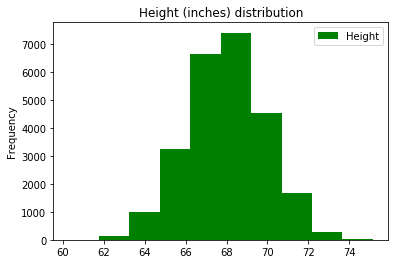

In [4]:
data.plot(y="Height", kind="hist", color="green", title="Height (inches) distribution")

In [5]:
def make_bmi(height_inch, weight_pound):
    meter_to_inch, kilo_to_pound = 39.37, 2.20462
    return (weight_pound / kilo_to_pound) / \
            (height_inch / meter_to_inch) ** 2

In [6]:
data["BMI"] = data.apply(lambda row: make_bmi(row["Height"], row["Weight"]), axis=1)

In [7]:
print(data.head())

         Height    Weight        BMI
Index                               
1      65.78331  112.9925  18.357573
2      71.51521  136.4873  18.762577
3      69.39874  153.0269  22.338895
4      68.21660  142.3354  21.504526
5      67.78781  144.2971  22.077581


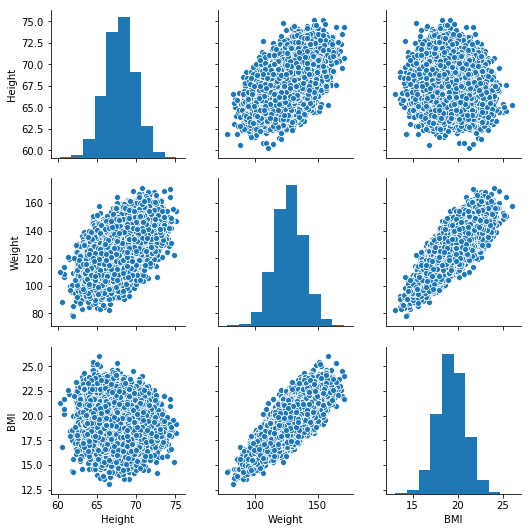

In [8]:
sns.pairplot(data)

In [9]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

In [10]:
data["Weight category"] = data["Weight"].apply(weight_category)

In [11]:
print(data.head())

         Height    Weight        BMI  Weight category
Index                                                
1      65.78331  112.9925  18.357573                1
2      71.51521  136.4873  18.762577                2
3      69.39874  153.0269  22.338895                3
4      68.21660  142.3354  21.504526                2
5      67.78781  144.2971  22.077581                2


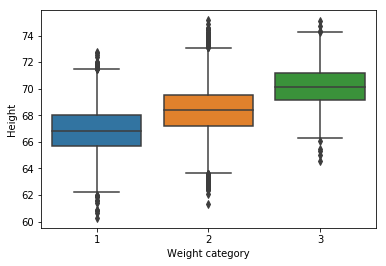

In [12]:
sns.boxplot(x=data["Weight category"], y=data["Height"])

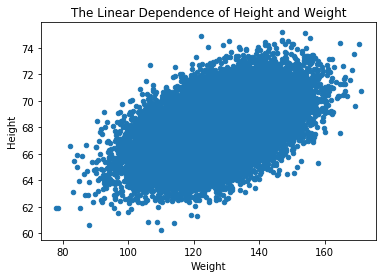

In [15]:
data.plot.scatter(x="Weight", y="Height", title="The Linear Dependence of Height and Weight")

In [26]:
def error(w0, w1, data):
    sum = 0
    for _, row in data.iterrows():
        sum += (row["Height"] - (w0 + w1 * row["Weight"])) ** 2
    return sum

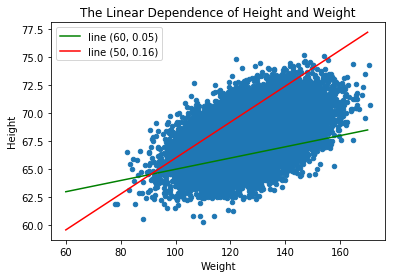

In [30]:
def y1(x):
    return 60 + 0.05 * x

def y2(x):
    return 50 + 0.16 * x

x = np.linspace(60, 170)
data.plot.scatter(x="Weight", y="Height", title="The Linear Dependence of Height and Weight")
plt.plot(x, y1(x), color="green")
plt.plot(x, y2(x), color="red")
plt.legend(("line (60, 0.05)", "line (50, 0.16)"))